In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [255]:
dataset = pd.read_csv('G:\dataanalytics\datastorm\data-storm-10\credit_card_default_train.csv')
print(len(dataset))
print(dataset.head())

24000
  Client_ID Balance_Limit_V1 Gender EDUCATION_STATUS MARITAL_STATUS  \
0        A2               1M      M         Graduate          Other   
1        A3               1M      F      High School          Other   
2        A4             100K      F      High School         Single   
3        A5             200K      F         Graduate         Single   
4        A6               1M      F         Graduate          Other   

            AGE  PAY_JULY  PAY_AUG  PAY_SEP  PAY_OCT         ...          \
0         31-45        -1       -1       -1       -1         ...           
1  Less than 30         0       -1       -1       -1         ...           
2         31-45         4        3        2        2         ...           
3         31-45         2        0        0        0         ...           
4         31-45         2        2        0        0         ...           

   DUE_AMT_OCT  DUE_AMT_NOV  DUE_AMT_DEC  PAID_AMT_JULY  PAID_AMT_AUG  \
0        39418       162772       -13

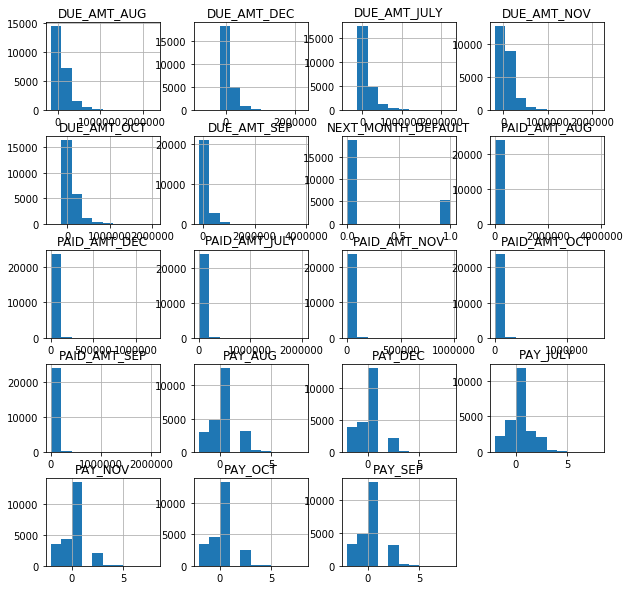

In [256]:
plt.rcParams['figure.figsize'] = (10, 10)
dataset.hist()
plt.show()

In [289]:
dataset.corr(method ='pearson') 

,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,pay_JULY,pay_AUG,pay_SEP,pay_OCT,pay_NOV,pay_DEC,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,NEXT_MONTH_DEFAULT
Gender,1.000000,-0.026691,-0.031573,0.088170,-0.034703,-0.031384,-0.023069,-0.021000,-0.018022,-0.017319,0.054311,0.066210,0.061622,0.055779,0.049763,0.040451,0.041649
EDUCATION_STATUS,-0.026691,1.000000,0.119826,0.015596,-0.042483,-0.043425,-0.033415,-0.027321,-0.019998,-0.027280,0.124152,0.151570,0.142695,0.136203,0.127588,0.116774,0.038902
MARITAL_STATUS,-0.031573,0.119826,1.000000,0.428625,-0.024868,-0.021406,-0.028634,-0.022837,-0.029122,-0.022843,-0.018201,-0.024576,-0.031389,-0.030060,-0.031228,-0.026591,0.027905
AGE,0.088170,0.015596,0.428625,1.000000,-0.051050,-0.045183,-0.048131,-0.045809,-0.045724,-0.041110,-0.051501,-0.059180,-0.055020,-0.051698,-0.057987,-0.052588,0.005968
pay_JULY,-0.034703,-0.042483,-0.024868,-0.051050,1.000000,0.860689,0.818925,0.791067,0.754987,0.713140,-0.204704,-0.251448,-0.207271,-0.205095,-0.207456,-0.209856,0.003260
pay_AUG,-0.031384,-0.043425,-0.021406,-0.045183,0.860689,1.000000,0.785031,0.786572,0.758963,0.710055,-0.207477,-0.246161,-0.251940,-0.220181,-0.221404,-0.224514,-0.004880
pay_SEP,-0.023069,-0.033415,-0.028634,-0.048131,0.818925,0.785031,1.000000,0.834467,0.786149,0.741948,-0.195775,-0.235153,-0.239105,-0.260678,-0.238936,-0.239551,0.000166
pay_OCT,-0.021000,-0.027321,-0.022837,-0.045809,0.791067,0.786572,0.834467,1.000000,0.845878,0.790635,-0.194653,-0.232024,-0.237378,-0.256022,-0.286632,-0.264389,-0.003904
pay_NOV,-0.018022,-0.019998,-0.029122,-0.045724,0.754987,0.758963,0.786149,0.845878,1.000000,0.821469,-0.195308,-0.229164,-0.233080,-0.251184,-0.277282,-0.304123,-0.006098
pay_DEC,-0.017319,-0.027280,-0.022843,-0.041110,0.713140,0.710055,0.741948,0.790635,0.821469,1.000000,-0.189315,-0.225434,-0.227440,-0.242379,-0.264150,-0.290289,-0.009377


In [257]:
dataset.isna().sum()
dataset.isnull().sum()

Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [258]:
dataset.loc[dataset['Gender'] == "M", 'Gender'] = 1
dataset.loc[dataset['Gender'] == "F", 'Gender'] = 2
dataset.loc[dataset['EDUCATION_STATUS'] == "Graduate", 'EDUCATION_STATUS'] = 1
dataset.loc[dataset['EDUCATION_STATUS'] == "High School", 'EDUCATION_STATUS'] = 2
dataset.loc[dataset['EDUCATION_STATUS'] == "Other", 'EDUCATION_STATUS'] = 3
dataset.loc[dataset['MARITAL_STATUS'] == "Other", 'MARITAL_STATUS'] = 1
dataset.loc[dataset['MARITAL_STATUS'] == "Single", 'MARITAL_STATUS'] = 2
dataset.loc[dataset['AGE'] == "Less than 30", 'AGE'] = 1
dataset.loc[dataset['AGE'] == "31-45", 'AGE'] = 2
dataset.loc[dataset['AGE'] == "46-65", 'AGE'] = 3
dataset.loc[dataset['AGE'] == "More than 65", 'AGE'] = 4

In [259]:
dataset.PAY_JULY = dataset.PAY_JULY + 2
dataset.PAY_AUG = dataset.PAY_AUG + 2
dataset.PAY_SEP = dataset.PAY_SEP + 2
dataset.PAY_OCT = dataset.PAY_OCT + 2
dataset.PAY_NOV = dataset.PAY_NOV + 2
dataset.PAY_DEC = dataset.PAY_DEC + 2

In [260]:
dataset.insert(6,'pay_JULY',dataset['PAID_AMT_JULY']- dataset['DUE_AMT_JULY'])
dataset.insert(7,'pay_AUG',dataset['PAID_AMT_AUG']- dataset['DUE_AMT_AUG'])
dataset.insert(8,'pay_SEP',dataset['PAID_AMT_SEP']- dataset['DUE_AMT_SEP'])
dataset.insert(9,'pay_OCT',dataset['PAID_AMT_OCT']- dataset['DUE_AMT_OCT'])
dataset.insert(10,'pay_NOV',dataset['PAID_AMT_NOV']- dataset['DUE_AMT_NOV'])
dataset.insert(11,'pay_DEC',dataset['PAID_AMT_DEC']- dataset['DUE_AMT_DEC'])

In [261]:
dataset = dataset.drop('Client_ID',axis=1)
dataset = dataset.drop('Balance_Limit_V1',axis=1)
dataset = dataset.drop('PAID_AMT_JULY',axis=1)
dataset = dataset.drop('DUE_AMT_JULY',axis=1)
dataset = dataset.drop('PAID_AMT_AUG',axis=1)
dataset = dataset.drop('DUE_AMT_AUG',axis=1)
dataset = dataset.drop('PAID_AMT_SEP',axis=1)
dataset = dataset.drop('DUE_AMT_SEP',axis=1)
dataset = dataset.drop('PAID_AMT_OCT',axis=1)
dataset = dataset.drop('DUE_AMT_OCT',axis=1)
dataset = dataset.drop('PAID_AMT_NOV',axis=1)
dataset = dataset.drop('DUE_AMT_NOV',axis=1)
dataset = dataset.drop('PAID_AMT_DEC',axis=1)
dataset = dataset.drop('DUE_AMT_DEC',axis=1)

In [263]:
x = dataset.iloc[:,0:16]
y = dataset.iloc[:,16]
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [288]:
xgb_model = xgb.XGBClassifier(learning_rate =0.0001,
    n_estimators=250,
    max_depth = 5,
    min_child_weight = 1,
    gamma=0.01,
    subsample=0.45,
    colsample_bytree=0.9,
    reg_alpha=1,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=0)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_train)
print("Training Accuracy :",accuracy_score(y_train, y_pred))
y_pred = xgb_model.predict(x_test)
print("Testing Accuracy :",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy : 0.8236979166666667
Testing Accuracy : 0.821875
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      3739
          1       0.68      0.37      0.48      1061

avg / total       0.81      0.82      0.80      4800



C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
dataset1 = pd.read_csv('G:\dataanalytics\datastorm\data-storm-10\credit_card_default_test.csv')

In [ ]:
dataset1.loc[dataset1['Gender'] == "M", 'Gender'] = 1
dataset1.loc[dataset1['Gender'] == "F", 'Gender'] = 2
dataset1.loc[dataset1['EDUCATION_STATUS'] == "Graduate", 'EDUCATION_STATUS'] = 1
dataset1.loc[dataset1['EDUCATION_STATUS'] == "High School", 'EDUCATION_STATUS'] = 2
dataset1.loc[dataset1['EDUCATION_STATUS'] == "Other", 'EDUCATION_STATUS'] = 3
dataset1.loc[dataset1['MARITAL_STATUS'] == "Other", 'MARITAL_STATUS'] = 1
dataset1.loc[dataset1['MARITAL_STATUS'] == "Single", 'MARITAL_STATUS'] = 2
dataset1.loc[dataset1['AGE'] == "Less than 30", 'AGE'] = 1
dataset1.loc[dataset1['AGE'] == "31-45", 'AGE'] = 2
dataset1.loc[dataset1['AGE'] == "46-65", 'AGE'] = 3
dataset1.loc[dataset1['AGE'] == "More than 65", 'AGE'] = 4

In [ ]:
dataset1 = dataset1.drop('Client_ID',axis=1)
dataset1 = dataset1.drop('Balance_Limit_V1',axis=1)

In [ ]:
x = dataset1.iloc[:,0:22]

In [ ]:
print(x.head())

In [ ]:
y_pred = xgb_model.predict(x)